In [1]:
# Import library
import seaborn as sns
import pandas_profiling
import ipywidgets
from IPython.display import display, HTML
import scipy.stats as stats
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
import seaborn as sns
%matplotlib inline
import itertools

# For wordcloud
from wordcloud import WordCloud
from PIL import Image

# Other NLP
import re
import spacy
import nltk
from nltk.corpus import stopwords

#For sentiment analysis
from textblob import TextBlob

In [2]:
#Prvious dataset
df_previous = pd.read_csv('./Audible_Dataset_final.csv')

In [3]:
#Scraped dataset using scrap.py
df = pd.read_csv('./Audible_data_updated.csv')

In [4]:
df_previous.shape

(2269, 110)

In [5]:
df.shape

(2288, 114)

In [6]:
#Filling out the missing ratings (if we did find them)
df = pd.merge(df,df_previous[['Book Title', 'Rating']], how='left', on='Book Title')

In [7]:
#Rmoving unnecessary columns
df.drop(columns=['Rating_x', 'Unnamed: 112', 'Unnamed: 113'],inplace=True)

In [8]:
#Changing column name of the last column to make it in format of the other Reviews
df = df.rename(columns={'Review100': 'Review 100'})
#Changing column name of Rating_x to Rating
df = df.rename(columns={'Rating_y': 'Rating'})

### Adding number of reviews column

In [9]:
#Creating a column that will contain the number of reviews in this dataset
df.insert(df.shape[1], 'nbr_reviews', '0')

In [10]:
#Counting the number of reviews
for index, row in df.iterrows():
    nbr_reviews = 0
    for review_j in range(1, 100):
        #Verifying if it's not a nan value
        if(row['Review '+str(review_j)] == row['Review '+str(review_j)]):
            nbr_reviews +=1
        df.at[index,'nbr_reviews'] = nbr_reviews

In [11]:
#Changing the nbr_reviews column type to float
df['nbr_reviews'] = df['nbr_reviews'].astype(float)

### Changing Audio Runtime units from hours to minutes

In [12]:
df['Audio Runtime'] = df['Audio Runtime'].apply(lambda x: round(x*60))

### Keeping only books with  rating number (betwwen 0 and 5)

In [13]:
df[df['Rating'].notnull()]['Rating'].unique()

array(['5', '4.5', '4.8', 'Not rated yet', '4.6', '4.9', '4.7', '4.3',
       '4.2', '4.4', '4', '4.1', '5 out of 5 stars', '3.3', '3.9', '3.6',
       '3.8', '4.5 out of 5 stars', '2.3', '3', '1', '3.5', '2.5', '3.2',
       '1.8', '3.1', '2.8', '2.7', '3.4', '2.2', '2.9',
       '4 out of 5 stars', '3.7', '1.5'], dtype=object)

#### Cleaning the Rating column
- Removing null values
- Removing the one with label 'Not rated yet'
- Assign 5 to '5 out of 5 stars'
- Assign 4.5 to '4.5 out of 5 stars'
- Assign 4 to '4 out of 5 stars'
- Removing ratings more than 5

In [14]:
#Removing the one with label 'Not rated yet'
df = df[df['Rating'] != 'Not rated yet']
#Removing null values
df = df[df['Rating'].notnull()]
#Replacing 
df['Rating'] = df['Rating'].apply(lambda x: '5' if(x=='5 out of 5 stars') else (x))
df['Rating'] = df['Rating'].apply(lambda x: '4.5' if(x=='4.5 out of 5 stars') else (x))
df['Rating'] = df['Rating'].apply(lambda x: '4' if(x=='4 out of 5 stars') else (x))
#converting Rating column to float
df['Rating'] = df['Rating'].astype(float)
#Removing values more than 5
df = df[df['Rating']<=5]

In [15]:
#Verification
df['Rating'].unique()

array([5. , 4.5, 4.8, 4.6, 4.9, 4.7, 4.3, 4.2, 4.4, 4. , 4.1, 3.3, 3.9,
       3.6, 3.8, 2.3, 3. , 1. , 3.5, 2.5, 3.2, 1.8, 3.1, 2.8, 2.7, 3.4,
       2.2, 2.9, 3.7, 1.5])

In [16]:
df['Price'].unique()

array(['29.65', '24.95', '31.49', '19.95', '32.71', '22.4', '28', '15.4',
       '11.72', '30.79', '31.5', '20.99', '22.67', '29.99', '29.95',
       '17.49', '28.34', '14.95', '34.22', '27.37', '22.8', '10.46',
       '23.95', '16.35', '31.47', '27.95', '24.99', '31.93', '27.99',
       '18.89', '34.99', '35', '42', '46.89', '24.49', '38.5', '14.69',
       '29.84', '47.93', '22.81', '39.87', '25.09', '6.97', '13.27', '0',
       '44.99', '21', '36.5', '20.52', '38.49', '17', '42.2', '23.07',
       '6.95', '23.62', '49.05', '23.99', '21.67', '33.95', '36.33',
       '13.99', '45.5', '23.93', '40.59', '28.5', '33.08', '24.51',
       '38.78', '31.18', '24.5', '31.95', '18.24', '59.99', '39.95',
       '26.59', '39.2', '25.51', '19.99', '14.68', '21.27', '34.95',
       '39.99', '14.99', '19.59', '20', '34.21', '63', '55.99', '25.08',
       '41.27', '26.6', '39.92', '27.93', '47.24', '37.79', '41.99',
       '12.59', '56.95', '24.47', '32.19', '22.63', '18.86', '29.61',
       '17.09'

In [17]:
#Fill nan values in Price column with the median 
df['Price'].fillna((df['Price'].median()), inplace=True)

In [18]:
#Changing the Price column type to float
df['Price'] = df['Price'].astype(float)

In [19]:
#Verification
df['Price'].unique()

array([29.65, 24.95, 31.49, 19.95, 32.71, 22.4 , 28.  , 15.4 , 11.72,
       30.79, 31.5 , 20.99, 22.67, 29.99, 29.95, 17.49, 28.34, 14.95,
       34.22, 27.37, 22.8 , 10.46, 23.95, 16.35, 31.47, 27.95, 24.99,
       31.93, 27.99, 18.89, 34.99, 35.  , 42.  , 46.89, 24.49, 38.5 ,
       14.69, 29.84, 47.93, 22.81, 39.87, 25.09,  6.97, 13.27,  0.  ,
       44.99, 21.  , 36.5 , 20.52, 38.49, 17.  , 42.2 , 23.07,  6.95,
       23.62, 49.05, 23.99, 21.67, 33.95, 36.33, 13.99, 45.5 , 23.93,
       40.59, 28.5 , 33.08, 24.51, 38.78, 31.18, 24.5 , 31.95, 18.24,
       59.99, 39.95, 26.59, 39.2 , 25.51, 19.99, 14.68, 21.27, 34.95,
       39.99, 14.99, 19.59, 20.  , 34.21, 63.  , 55.99, 25.08, 41.27,
       26.6 , 39.92, 27.93, 47.24, 37.79, 41.99, 12.59, 56.95, 24.47,
       32.19, 22.63, 18.86, 29.61, 17.09, 25.5 , 28.3 , 34.9 , 27.97,
       19.6 , 52.5 , 21.81, 25.19, 13.29, 23.09, 30.09, 19.84, 21.66,
       43.93, 56.  , 33.6 , 38.46, 39.93, 19.62, 15.93, 17.47, 53.61,
       19.38, 35.93,

### Filling nan values in Total No. of Ratings column with the median 

In [20]:
df['Total No. of Ratings'].fillna((df['Total No. of Ratings'].median()), inplace=True)

### Cleaning the Date column

In [21]:
#Drop nan values of in column Date
df.dropna(subset = ["Date"], inplace=True)
print('The number of rows in our dataframe after removing duplicates is {}'.format(df.shape[0]))

The number of rows in our dataframe after removing duplicates is 1750


In [22]:
#Keep only the year in Date column for comparison and put it in the right format
df['Date'] = df['Date'].apply(lambda x: x[0:-2]+str(20)+x.split('/')[2] if(len(x.split('/')[2]) == 2) else (x))

In [23]:
#Changing the year 2098 and 2099 to 1998 and 1999 
df['Date'] = df['Date'].apply(lambda x: x[0:-4]+'1998' if(x.split('/')[2] == '2098') else (x))
df['Date'] = df['Date'].apply(lambda x: x[0:-4]+'1999' if(x.split('/')[2] == '2099') else (x))

In [24]:
#Verification
df['Date'].unique()

array(['05/25/2021', '05/26/2021', '05/11/2021', '05/14/2021',
       '05/29/2021', '05/27/2021', '04/27/2021', '05/07/2021',
       '11/07/2013', '05/04/2021', '10/20/2020', '10/21/2014',
       '04/12/2011', '01/27/2005', '08/15/2017', '05/17/2016',
       '10/16/2018', '12/15/1999', '09/13/2016', '04/25/2017',
       '05/20/2021', '11/14/2008', '04/18/2017', '10/07/2011',
       '04/20/2021', '11/30/2012', '04/07/2020', '09/16/2004',
       '09/03/2013', '05/18/2021', '08/25/2020', '04/06/2021',
       '02/16/2021', '11/15/2016', '03/10/2020', '10/06/2020',
       '06/02/2020', '03/02/2021', '05/23/2017', '04/22/2021',
       '04/15/2021', '12/27/2015', '09/29/2020', '06/04/2013',
       '10/19/2015', '12/31/2006', '04/03/2018', '10/10/2017',
       '06/26/2012', '08/01/2008', '06/28/2016', '12/26/2004',
       '12/12/2011', '10/25/2011', '06/13/2017', '07/23/2020',
       '07/26/2018', '08/14/2020', '04/08/2021', '04/04/2017',
       '03/09/2021', '08/04/2020', '12/30/2012', '09/20

In [25]:
# Make a column with only the year for simplicity
df['releaseyear'] = df['Date'].apply(lambda x: int(x.split('/')[2]))

In [26]:
# Check numerical columns
df.dtypes

Book Title        object
Book Subtitle     object
Book Author       object
Book Narrator     object
Audio Runtime      int64
                  ...   
Review 99         object
Review 100        object
Rating           float64
nbr_reviews      float64
releaseyear        int64
Length: 114, dtype: object

In [27]:
# Filter numerical columns 
df_numeric = df.select_dtypes(include=np.number)

In [28]:
# Check if all numerical columns are included
df_numeric.head(5)

,Audio Runtime,Total No. of Ratings,Price,Rating,nbr_reviews,releaseyear
0,391,1831.0,29.65,5.0,40.0,2021
1,813,2205.0,24.95,4.5,30.0,2021
4,612,664.0,29.65,4.5,40.0,2021
5,822,604.0,31.49,4.8,40.0,2021
8,765,574.0,29.65,4.6,29.0,2021


In [29]:
# Calculate the mean for each numerical column
df_numeric_desc = pd.DataFrame(df_numeric.mean(axis=0),columns=['mean'])

In [30]:
# Calculate the median for each numerical column
df_numeric_desc['median']=df_numeric.median(axis=0).tolist()

In [31]:
# Calculate minimum for each numerical column
df_numeric_desc['minimum']=df_numeric.min(axis=0).tolist()

In [32]:
# Calculate maximum for each numerical column
df_numeric_desc['maximum']=df_numeric.max(axis=0).tolist()

In [33]:
df_numeric_desc

,mean,median,minimum,maximum
Audio Runtime,648.546857,573.50,2.0,6139.0
Total No. of Ratings,9471.442857,2407.00,2.0,246938.0
Price,25.007417,24.95,0.0,84.0
Rating,4.595886,4.70,2.2,5.0
nbr_reviews,67.204571,99.00,0.0,99.0
releaseyear,2016.512571,2018.00,1998.0,2021.0


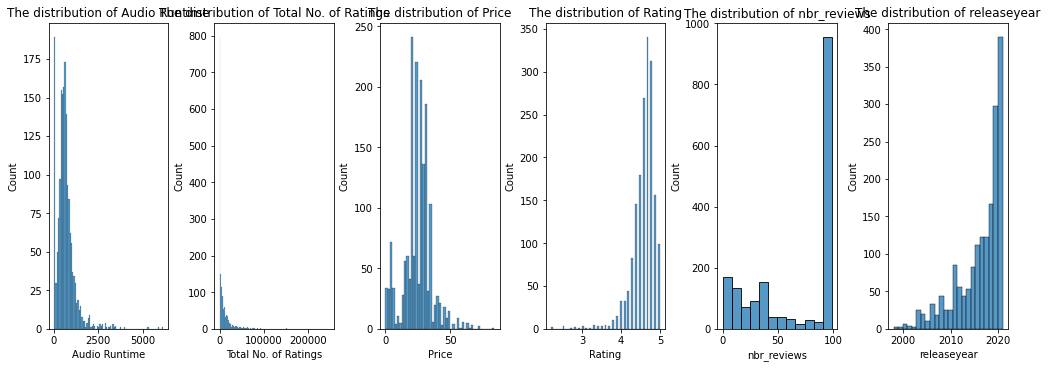

In [34]:
# Plot the distribution for all the numerical columns in a single image
fig, axes = plt.subplots(1,6,figsize=(14,5),constrained_layout=True)
axes = axes.ravel()
for ax, col in zip(axes, df_numeric.columns):
    ax.set_title(str("The distribution of "+col))
    sns.histplot(df[col], ax=ax)
plt.show()

In [37]:
df.to_csv('cleaned_data.csv')